In [1]:
# Required packages:
library(SCopeLoomR)
library(AUCell)
library(SCENIC)



Attaching package: ‘SCopeLoomR’


The following object is masked from ‘package:base’:

    flush



Attaching package: ‘SCENIC’


The following object is masked from ‘package:AUCell’:

    plotEmb_rgb




In [2]:
scenicLoomPath <- "thyroid_cancer_output.loom"
motifEnrichmentFile <- "thyroid_cancer_reg.csv"

#scenicLoomPath <- "CD163_Macro_output2.loom"
#motifEnrichmentFile <- "macro_reg.csv"

file.exists(scenicLoomPath)
file.exists(motifEnrichmentFile)

loom <- open_loom(scenicLoomPath)
cellClusters <- get_clusterings(loom)
loom

# Loading results from a .loom file
library(SCopeLoomR)
loom <- open_loom(scenicLoomPath)
# Read information from loom file:
exprMat <- get_dgem(loom)
exprMat_log <- log2(exprMat+1) # Better if it is logged/normalized
regulons_incidMat <- get_regulons(loom, column.attr.name="Regulons")
regulons <- regulonsToGeneLists(regulons_incidMat)
regulonAUC <- get_regulons_AUC(loom, column.attr.name = "RegulonsAUC")
regulonAucThresholds <- get_regulon_thresholds(loom)
embeddings <- get_embeddings(loom)
cellClusters <- get_clusterings(loom)
close_loom(loom)

[1] TRUE

[1] TRUE

Class: H5File
Filename: /node210data/gyeongdaekim/pyscenic/thyroid/cancer/thyroid_cancer_output.loom
Access type: H5F_ACC_RDONLY
Attributes: last_modified
Listing:
       name    obj_type  dataset.dims dataset.type_class
      attrs   H5I_GROUP          <NA>               <NA>
  col_attrs   H5I_GROUP          <NA>               <NA>
 col_graphs   H5I_GROUP          <NA>               <NA>
     layers   H5I_GROUP          <NA>               <NA>
     matrix H5I_DATASET 45297 x 23859          H5T_FLOAT
  row_attrs   H5I_GROUP          <NA>               <NA>
 row_graphs   H5I_GROUP          <NA>               <NA>

In [3]:
selectedResolution <- "0" # select resolution
# Split the cells by cluster:
cellsPerCluster <- split(rownames(cellClusters), cellClusters[,selectedResolution]) 
regulonAUC <- regulonAUC[onlyNonDuplicatedExtended(rownames(regulonAUC)),]
# Calculate average expression:
regulonActivity_byCellType <- sapply(cellsPerCluster,
                                     function(cells) rowMeans(getAUC(regulonAUC)[,cells]))

In [4]:
regulonActivity_byCellType_Scaled <- t(scale(t(regulonActivity_byCellType), center = T, scale=T))

In [5]:
head(regulonActivity_byCellType_Scaled)

,1,2,3,4,5,6,7,8,9,10,11
ARID3A(+),-0.9383317,2.1198989,1.8219449,-0.3017475,-0.4569217,-0.1960464,-0.36614970,-0.1848947,-0.6404422,-0.53331521,-0.3239946
ARID5B(+),0.6247890,2.3953183,0.6592356,-0.7192586,-1.2896254,0.2242346,-0.49036923,0.0604622,-0.6686083,-0.08293438,-0.7132438
ARNT(+),-1.5873826,-0.8366421,-0.1761924,1.2986391,1.6974960,-0.1412080,0.77424842,0.1756293,-0.7115765,-0.91849130,0.4254800
ARNT2(+),-1.6154446,-0.1508238,0.5845598,-0.9525961,-1.3232880,1.1670119,0.39552721,1.6437838,-0.1792813,0.11006775,0.3204833
ARX(+),-0.8121391,-0.4269927,-0.4275445,-0.6358096,-0.9745925,1.6181910,-0.08834194,1.7826086,-1.1097620,0.60226083,0.4721219
ATF1(+),-2.2277717,-0.3655591,0.7248919,-0.4579583,-0.7340675,0.8269374,0.30367989,1.6386447,0.1600990,0.32431974,-0.1932160


In [11]:
write.csv(regulonActivity_byCellType_Scaled, file = "/home/gyeongdaekim/regulonActivity_byCellType_Scaled.csv", sep =",")

Warning message in write.csv(regulonActivity_byCellType_Scaled, file = "/home/gyeongdaekim/regulonActivity_byCellType_Scaled.csv", :
“attempt to set 'sep' ignored”


In [6]:
library(pheatmap)

In [7]:
regulonAUC2<-t(scale(t(getAUC(regulonAUC)), center = T, scale=T))

In [14]:
cellClusters2<-as.data.frame(cellClusters)
colnames(cellClusters2) <- "cluster"
head(cellClusters2)
table(cellClusters2$cluster)

,cluster
,<int>
ATC_Ca_LJ_ACATGGTAGCGGCTTC-1,1
ATC_Ca_LJ_ACGCAGCCAACTGCTA-1,4
ATC_Ca_LJ_ACTGCTCTCATTGCGA-1,1
ATC_Ca_LJ_ATAGACCTCCCATTAT-1,6
ATC_Ca_LJ_ATCATGGTCGTACCGG-1,6
ATC_Ca_LJ_ATCTACTAGGCTAGCA-1,4



    1     2     3     4     5     6     7     8     9    10    11 
  768   908  1337  2765  1950 29082  3106   395  3341  1303   342 

In [24]:
library(RColorBrewer)
#mypalette<-list(brewer.pal(11,"Paired"))
mypalette<-list(cluster= c("1"="#A6CEE3","2"="#1F78B4","3"="#B2DF8A","4"="#33A02C","5"="#FB9A99","6"="#E31A1C","7"="#FDBF6F","8"="#FF7F00","9"="#CAB2D6","10"="#6A3D9A","11"="#FFFF99"))

mypalette


$cluster
        1         2         3         4         5         6         7         8 
"#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F" "#FF7F00" 
        9        10        11 
"#CAB2D6" "#6A3D9A" "#FFFF99"

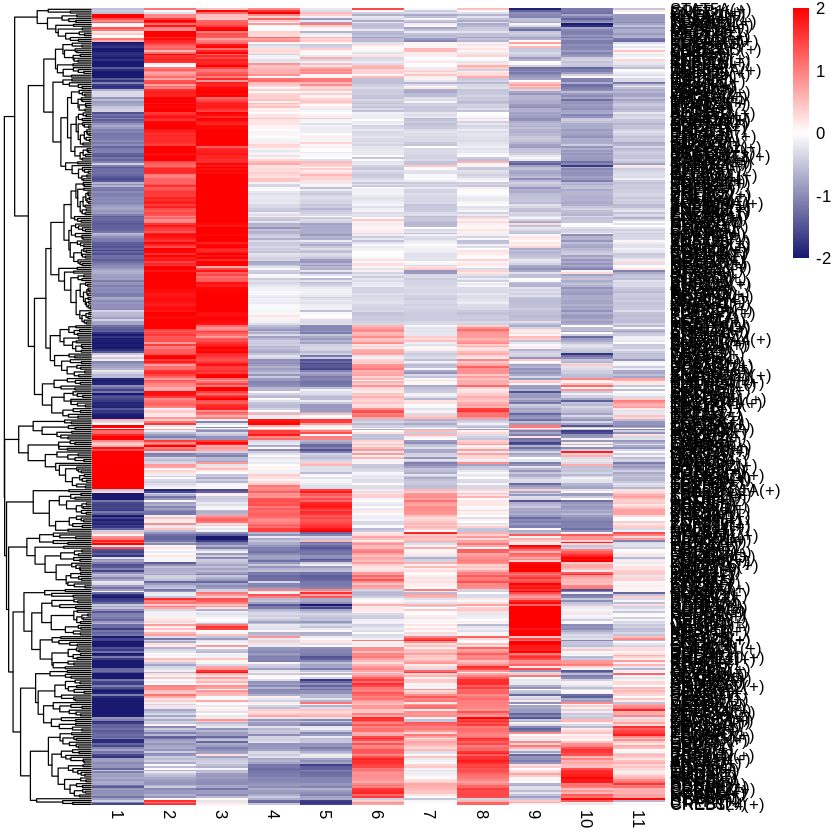

In [39]:

breaksList = seq(-2, 2, by = 0.01)

p<-pheatmap(regulonActivity_byCellType_Scaled, cluster_rows = T, cluster_cols = F, 
         color = colorRampPalette(c("midnightblue",'white','red'))(400), breaks = breaksList, border_color = "white")

pdf(file = "/home/gyeongdaekim/cancer_scenic.pdf",   # The directory you want to save the file in
    width = 9, # The width of the plot in inches
    height = 9) # 

In [33]:
regulonActivity_byCellType_Scaled["CREB3L1(+)","MYC(+)","TEAD4(+)",,]

ERROR: Error in regulonActivity_byCellType_Scaled["CREB3L1(+)", "MYC(+)", "TEAD4(+)", : incorrect number of dimensions


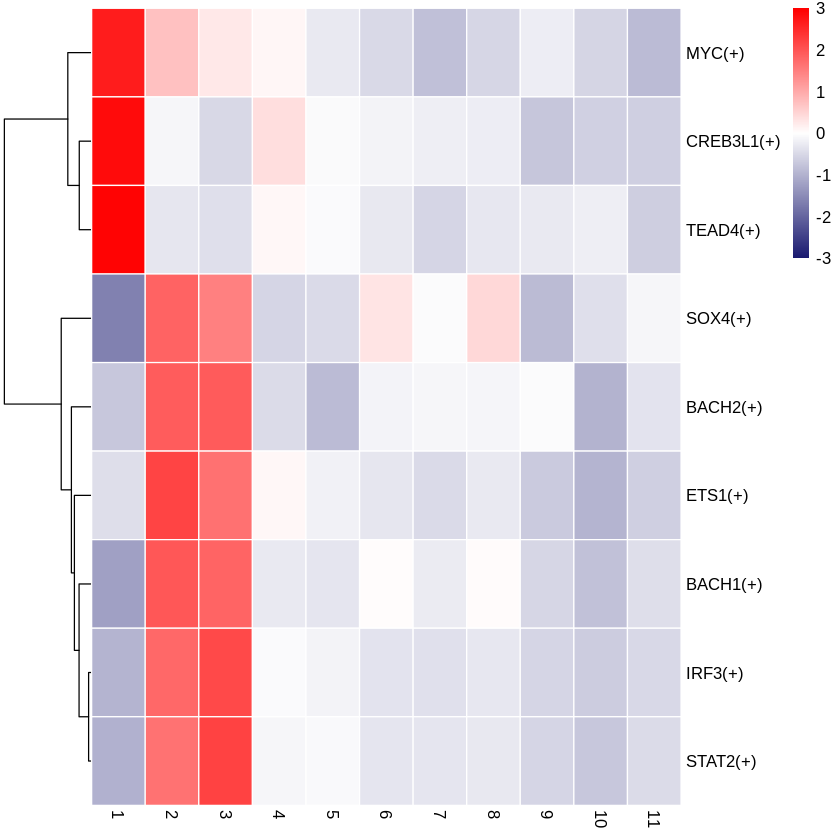

In [35]:
breaksList = seq(-3, 3, by = 0.01)

pheatmap(regulonActivity_byCellType_Scaled[c("CREB3L1(+)","MYC(+)","TEAD4(+)","BACH1(+)","BACH2(+)","ETS1(+)","SOX4(+)","IRF3(+)","STAT2(+)"),],
         cluster_rows = T, cluster_cols = F, 
         color = colorRampPalette(c("midnightblue",'white','red'))(600),
         breaks = breaksList, border_color = "white")





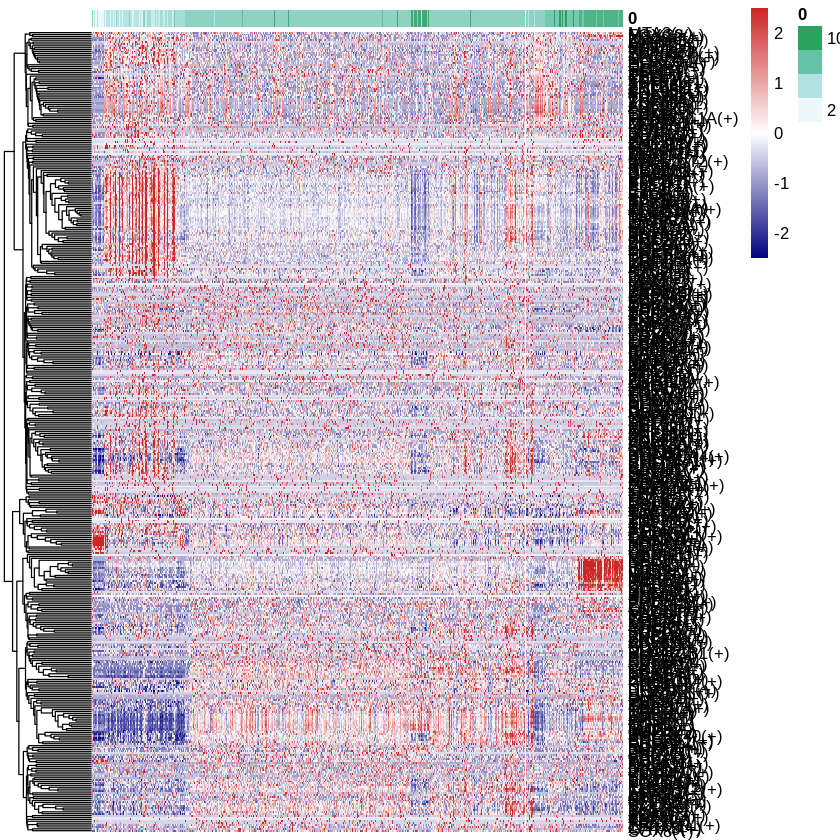

In [25]:
breaksList = seq(-2.5, 2.5, by = 0.01)

pheatmap(regulonAUC2, cluster_rows = T, cluster_cols = F, annotation_col = cellClusters, 
         color = colorRampPalette(c("navy", "white", "firebrick3"))(500), 
         show_colnames = F, breaks = breaksList, border_color = "black",
         annotation_colors = mypalette)

# pheatmap(regulonAUC2, cluster_rows = T, cluster_cols = F, color = colorRampPalette(c("white", "black"))(600), 
#         show_colnames = F, breaks = breaksList, border_color = "black")



In [38]:
#write.table(regulonAUC2, file = "/home/gyeongdaekim/matrix.txt", sep = "\t")
write.table(regulonActivity_byCellType_Scaled, file = "/home/gyeongdaekim/regulonActivity_byCellType_Scaled.txt", sep = "\t")


In [39]:
summary(getAUC(regulonAUC))

In [44]:
regulonAUC2[1:4,1:5]

,ATC_Ca_LJ_ACATGGTAGCGGCTTC-1,ATC_Ca_LJ_ACGCAGCCAACTGCTA-1,ATC_Ca_LJ_ACTGCTCTCATTGCGA-1,ATC_Ca_LJ_ATAGACCTCCCATTAT-1,ATC_Ca_LJ_ATCATGGTCGTACCGG-1
ARID3A(+),-0.6140203,-0.2787440,-0.8030818,-1.136215767,0.1775745
ARID5B(+),0.6074192,-0.3792020,1.4535559,0.002420751,0.7705105
ARNT(+),-0.6695321,-0.7340373,-0.7340373,1.469892737,-0.7340373
ARNT2(+),-0.5871062,-0.5871062,-0.5871062,1.954084237,-0.5871062


In [45]:
regulonActivity_byCellType_Scaled[1:4,1:5]

,1,2,3,4,5
ARID3A(+),-0.9383317,2.1198989,1.8219449,-0.3017475,-0.4569217
ARID5B(+),0.6247890,2.3953183,0.6592356,-0.7192586,-1.2896254
ARNT(+),-1.5873826,-0.8366421,-0.1761924,1.2986391,1.6974960
ARNT2(+),-1.6154446,-0.1508238,0.5845598,-0.9525961,-1.3232880
